In [1]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colors as colors
#!conda install -c conda-forge folium=0.5.0 --yes
import folium

In [2]:
#scrapping neighborhoods in Canada
df_tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')

In [3]:
df_tables

[    Postal Code           Borough  \
 0           M1A      Not assigned   
 1           M2A      Not assigned   
 2           M3A        North York   
 3           M4A        North York   
 4           M5A  Downtown Toronto   
 5           M6A        North York   
 6           M7A  Downtown Toronto   
 7           M8A      Not assigned   
 8           M9A         Etobicoke   
 9           M1B       Scarborough   
 10          M2B      Not assigned   
 11          M3B        North York   
 12          M4B         East York   
 13          M5B  Downtown Toronto   
 14          M6B        North York   
 15          M7B      Not assigned   
 16          M8B      Not assigned   
 17          M9B         Etobicoke   
 18          M1C       Scarborough   
 19          M2C      Not assigned   
 20          M3C        North York   
 21          M4C         East York   
 22          M5C  Downtown Toronto   
 23          M6C              York   
 24          M7C      Not assigned   
 25         

In [4]:
df_tables[0].head(10)

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,Not assigned
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


In [5]:
df_postal_codes_Canada = df_tables[0]

In [6]:
#changing 'Not assigned' to NaN value in Borough columns
df_postal_codes_Canada['Borough'] = df_postal_codes_Canada['Borough'].apply(lambda x: np.nan if x=='Not assigned' else x)

In [7]:
#changing 'Not assigned' to NaN value in Neighbourhood columns
df_postal_codes_Canada['Neighbourhood'] = df_postal_codes_Canada['Neighbourhood'].apply(lambda x: np.nan if x=='Not assigned' else x)

In [8]:
df_postal_codes_Canada.head(10)

,Postal Code,Borough,Neighbourhood
0,M1A,NaN,NaN
1,M2A,NaN,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,NaN,NaN
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


In [9]:
#Drop the the rows on which the Borough is empty
df_postal_codes_Canada= df_postal_codes_Canada[~df_postal_codes_Canada['Borough'].isna()]

In [10]:
df_postal_codes_Canada.head(10)

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"
11,M3B,North York,Don Mills
12,M4B,East York,"Parkview Hill, Woodbine Gardens"
13,M5B,Downtown Toronto,"Garden District, Ryerson"


In [11]:
df_postal_codes_Canada.rename(columns={'Neighbourhood':'Neighborhood'},inplace=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [12]:
# changing the values of Neighborhood columns to that of the Borough columns if the value is Neighborhood is NaN
df_postal_codes_Canada['Neighborhood']=df_postal_codes_Canada['Neighborhood'].replace('Not assigned', df_postal_codes_Canada['Borough'])

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [13]:
#checking if there are any NaN values is Neighborhood column
np.sum(df_postal_codes_Canada['Neighborhood'].isna())

0

In [14]:
df_postal_codes_Canada

,Postal Code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"
11,M3B,North York,Don Mills
12,M4B,East York,"Parkview Hill, Woodbine Gardens"
13,M5B,Downtown Toronto,"Garden District, Ryerson"


In [15]:
df_postal_codes_Canada=df_postal_codes_Canada.reset_index(drop=True)

In [16]:
df_postal_codes_Canada

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [17]:
df_postal_codes_Canada.rename(columns={'PostalCode':'Postal Code'},inplace=True)

In [18]:
df_postal_codes_Canada

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [19]:
#Read CSV file from link and load into dataframe
df_coordinates = pd.read_csv('http://cocl.us/Geospatial_data')

In [20]:
df_coordinates.head(10)

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [21]:
#merging the two dataframes on their postal codes
df_postalcodes_coordinates_Canada = df_postal_codes_Canada.merge(df_coordinates,on='Postal Code')

In [22]:
df_postalcodes_coordinates_Canada.head(10)

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


In [23]:
#count Bourough and Neighborhood
df_postalcodes_coordinates_Canada.groupby('Borough').count()['Neighborhood']

Borough
Central Toronto      9
Downtown Toronto    19
East Toronto         5
East York            5
Etobicoke           12
Mississauga          1
North York          24
Scarborough         17
West Toronto         6
York                 5
Name: Neighborhood, dtype: int64

In [24]:
df_toronto = df_postalcodes_coordinates_Canada[df_postalcodes_coordinates_Canada['Borough'].str.contains('Toronto')]

In [25]:
df_toronto.reset_index(inplace=True)

In [26]:
df_toronto.drop('index',axis=1,inplace=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [27]:
df_toronto

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031
5,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
6,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
7,M6G,Downtown Toronto,Christie,43.669542,-79.422564
8,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
9,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259


In [28]:
df_toronto.sort_values(by='Postal Code',ascending=True,inplace=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [29]:
df_toronto.reset_index(inplace=True)

In [30]:
df_toronto.drop('index',axis=1,inplace=True)

In [31]:
df_toronto

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
5,M4P,Central Toronto,Davisville North,43.712751,-79.390197
6,M4R,Central Toronto,"North Toronto West, Lawrence Park",43.715383,-79.405678
7,M4S,Central Toronto,Davisville,43.704324,-79.388790
8,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160
9,M4V,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049


In [32]:
!conda install -c conda-forge geopy --yes

Solving environment: done

# All requested packages already installed.



## Getting Venues Data using Foursquare

In [33]:
from geopy.geocoders import Nominatim

In [34]:
#foursquare api credentials used to make api calls
CLIENT_ID = 'XA23NEAA5NI3H5DCPX3RN3GWASC0N5PV2CJEO2KUFNRP2LJ2' # your Foursquare ID
CLIENT_SECRET = '0UC1WTWQN4LKINUYMNNLIC5BSR1SFIKGDPMKAXCJVMY0CADQ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
limit=100
radius=500
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XA23NEAA5NI3H5DCPX3RN3GWASC0N5PV2CJEO2KUFNRP2LJ2
CLIENT_SECRET:0UC1WTWQN4LKINUYMNNLIC5BSR1SFIKGDPMKAXCJVMY0CADQ


In [35]:
import json
import requests

In [36]:
#filter and clean json data and transform it into a dataframe
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [37]:
#Get venues for all neighborhoods in our dataset
toronto_venues = getNearbyVenues(names=df_toronto['Neighborhood'],
                                   latitudes=df_toronto['Latitude'],
                                   longitudes=df_toronto['Longitude']
                                  )

The Beaches
The Danforth West, Riverdale
India Bazaar, The Beaches West
Studio District
Lawrence Park
Davisville North
North Toronto West, Lawrence Park
Davisville
Moore Park, Summerhill East
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Rosedale
St. James Town, Cabbagetown
Church and Wellesley
Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North & West, Forest Hill Road Park
The Annex, North Midtown, Yorkville
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Stn A PO Boxes
First Canadian Place, Underground city
Christie
Dufferin, Dovercourt Village
Little Portugal, Trinity
Brockton, Parkdale Village, Exhibition Place
High 

In [38]:
toronto_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,The Beaches,43.676357,-79.293031,Dip 'n Sip,43.678897,-79.297745,Coffee Shop
5,The Beaches,43.676357,-79.293031,Seaspray Restaurant,43.678888,-79.298167,Asian Restaurant
6,"The Danforth West, Riverdale",43.679557,-79.352188,MenEssentials,43.677820,-79.351265,Cosmetics Shop
7,"The Danforth West, Riverdale",43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant
8,"The Danforth West, Riverdale",43.679557,-79.352188,Cafe Fiorentina,43.677743,-79.350115,Italian Restaurant
9,"The Danforth West, Riverdale",43.679557,-79.352188,Louis Cifer Brew Works,43.677663,-79.351313,Brewery


In [39]:
#Number of unique venue categories
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 232 uniques categories.


In [40]:
#print out the list of categories
toronto_venues['Venue Category'].unique()[:234]

array(['Trail', 'Health Food Store', 'Pub', 'Neighborhood', 'Coffee Shop',
       'Asian Restaurant', 'Cosmetics Shop', 'Greek Restaurant',
       'Italian Restaurant', 'Brewery', 'Ice Cream Shop', 'Yoga Studio',
       'Juice Bar', 'Fruit & Vegetable Store', 'Restaurant', 'Bookstore',
       'Pizza Place', 'Café', 'Dessert Shop', 'Furniture / Home Store',
       'Bubble Tea Shop', 'Spa', 'Grocery Store', 'Bakery',
       'Caribbean Restaurant', 'Indian Restaurant', 'American Restaurant',
       'Lounge', 'Frozen Yogurt Shop', 'Liquor Store', 'Sushi Restaurant',
       'Gym', 'Fast Food Restaurant', 'Fish & Chips Shop', 'Park',
       'Burrito Place', 'Pet Store', 'Steakhouse', 'Movie Theater',
       'Sandwich Place', 'Board Shop', 'Light Rail Station',
       'Food & Drink Shop', 'Fish Market', 'Cheese Shop', 'Gay Bar',
       'Seafood Restaurant', 'Middle Eastern Restaurant',
       'Stationery Store', 'Comfort Food Restaurant', 'Thai Restaurant',
       'Coworking Space', 'Wine Bar

In [41]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,58,58,58,58,58,58
"Brockton, Parkdale Village, Exhibition Place",23,23,23,23,23,23
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",17,17,17,17,17,17
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",15,15,15,15,15,15
Central Bay Street,64,64,64,64,64,64
Christie,17,17,17,17,17,17
Church and Wellesley,76,76,76,76,76,76
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,34,34,34,34,34,34


In [42]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhoods'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot

,Neighborhoods,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,The Beaches,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,"The Danforth West, Riverdale",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,"The Danforth West, Riverdale",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,"The Danforth West, Riverdale",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,"The Danforth West, Riverdale",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# group the neighborhoods and check the mean occurrence of venue category in each neighborhood
toronto_grouped = toronto_onehot.groupby('Neighborhoods').mean().reset_index()
toronto_grouped.head(10)

,Neighborhoods,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.017241,0.0,0.0,0.000000,0.0,0.0,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
2,"Business reply mail Processing Centre, South C...",0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.058824
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.066667,0.066667,0.133333,0.2,0.066667,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
4,Central Bay Street,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.015625,0.0,0.0,0.015625,0.0,0.0,0.015625
5,Christie,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
6,Church and Wellesley,0.013158,0.000000,0.000000,0.000000,0.0,0.000000,0.013158,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.026316
7,"Commerce Court, Victoria Hotel",0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.040000,0.0,0.0,...,0.000000,0.0,0.0,0.020000,0.0,0.0,0.010000,0.0,0.0,0.000000
8,Davisville,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.029412,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
9,Davisville North,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000


In [44]:
# check all categories of restaurants
rest = toronto_grouped.columns.str.contains('Restaurant')

In [45]:
col1= toronto_grouped.columns[rest]

In [46]:
# all venue catgeories which are restaurants
col1

Index(['Afghan Restaurant', 'American Restaurant', 'Asian Restaurant',
       'Belgian Restaurant', 'Brazilian Restaurant',
       'Cajun / Creole Restaurant', 'Caribbean Restaurant',
       'Chinese Restaurant', 'Colombian Restaurant', 'Comfort Food Restaurant',
       'Cuban Restaurant', 'Dim Sum Restaurant', 'Doner Restaurant',
       'Dumpling Restaurant', 'Eastern European Restaurant',
       'Ethiopian Restaurant', 'Falafel Restaurant', 'Fast Food Restaurant',
       'Filipino Restaurant', 'French Restaurant', 'German Restaurant',
       'Gluten-free Restaurant', 'Greek Restaurant', 'Indian Restaurant',
       'Italian Restaurant', 'Japanese Restaurant', 'Korean Restaurant',
       'Latin American Restaurant', 'Mediterranean Restaurant',
       'Mexican Restaurant', 'Middle Eastern Restaurant',
       'Modern European Restaurant', 'Molecular Gastronomy Restaurant',
       'Moroccan Restaurant', 'New American Restaurant', 'Ramen Restaurant',
       'Restaurant', 'Seafood Restauran

In [47]:
# Create a new dataframe to check occurrences of Indian and Thai restaurants in all neighborhoods
sort_table_thai_india=toronto_grouped[['Neighborhoods','Indian Restaurant','Thai Restaurant']]

In [48]:
sort_table_thai_india

,Neighborhoods,Indian Restaurant,Thai Restaurant
0,Berczy Park,0.017241,0.017241
1,"Brockton, Parkdale Village, Exhibition Place",0.000000,0.000000
2,"Business reply mail Processing Centre, South C...",0.000000,0.000000
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.000000
4,Central Bay Street,0.015625,0.015625
5,Christie,0.000000,0.000000
6,Church and Wellesley,0.013158,0.013158
7,"Commerce Court, Victoria Hotel",0.000000,0.020000
8,Davisville,0.029412,0.029412
9,Davisville North,0.000000,0.000000


In [49]:
# dropping neighborhoods column as it contains string value and cannot be used to train model
to_clustering3 = sort_table_thai_india.drop(["Neighborhoods"], 1)

In [50]:
import matplotlib.pyplot as plt

In [51]:
from sklearn.cluster import KMeans

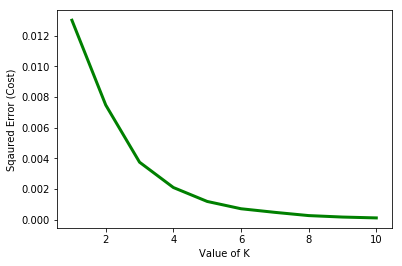

In [52]:
# calculating appropriate value of k
cost3 =[] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters=i, random_state=0).fit(to_clustering3) 
      
    # calculates squared error 
    # for the clustered points 
    cost3.append(kmeans.inertia_)      
  
# plot the cost against K values 
plt.plot(range(1, 11), cost3, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 

In [53]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(to_clustering3)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1], dtype=int32)

In [54]:
# adding cluster labels generated by the model to the previous dataframe
sort_table_thai_india["New Cluster Labels"] = kmeans.labels_

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [55]:
sort_table_thai_india

,Neighborhoods,Indian Restaurant,Thai Restaurant,New Cluster Labels
0,Berczy Park,0.017241,0.017241,0
1,"Brockton, Parkdale Village, Exhibition Place",0.000000,0.000000,1
2,"Business reply mail Processing Centre, South C...",0.000000,0.000000,1
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.000000,1
4,Central Bay Street,0.015625,0.015625,0
5,Christie,0.000000,0.000000,1
6,Church and Wellesley,0.013158,0.013158,0
7,"Commerce Court, Victoria Hotel",0.000000,0.020000,0
8,Davisville,0.029412,0.029412,0
9,Davisville North,0.000000,0.000000,1


## Examining clusters for each label

In [56]:
sort_table_thai_india[sort_table_thai_india['New Cluster Labels']==0]

,Neighborhoods,Indian Restaurant,Thai Restaurant,New Cluster Labels
0,Berczy Park,0.017241,0.017241,0
4,Central Bay Street,0.015625,0.015625,0
6,Church and Wellesley,0.013158,0.013158,0
7,"Commerce Court, Victoria Hotel",0.000000,0.020000,0
8,Davisville,0.029412,0.029412,0
11,"First Canadian Place, Underground city",0.000000,0.020000,0
25,"Richmond, Adelaide, King",0.000000,0.030000,0
30,"St. James Town, Cabbagetown",0.023256,0.023256,0
31,Stn A PO Boxes,0.010204,0.010204,0
32,Studio District,0.000000,0.025000,0


In [57]:
sort_table_thai_india[sort_table_thai_india['New Cluster Labels']==1]

,Neighborhoods,Indian Restaurant,Thai Restaurant,New Cluster Labels
1,"Brockton, Parkdale Village, Exhibition Place",0.00,0.000000,1
2,"Business reply mail Processing Centre, South C...",0.00,0.000000,1
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.00,0.000000,1
5,Christie,0.00,0.000000,1
9,Davisville North,0.00,0.000000,1
10,"Dufferin, Dovercourt Village",0.00,0.000000,1
12,"Forest Hill North & West, Forest Hill Road Park",0.00,0.000000,1
13,"Garden District, Ryerson",0.00,0.010000,1
14,"Harbourfront East, Union Station, Toronto Islands",0.01,0.000000,1
16,"India Bazaar, The Beaches West",0.00,0.000000,1


In [58]:
sort_table_thai_india[sort_table_thai_india['New Cluster Labels']==2]

,Neighborhoods,Indian Restaurant,Thai Restaurant,New Cluster Labels
15,"High Park, The Junction South",0.0,0.08,2


In [59]:
sort_table_thai_india.rename(columns={'Neighborhoods':'Neighborhood'},inplace=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [60]:
# merging the two dataframes together
to_merged = toronto_venues.join(sort_table_thai_india.set_index('Neighborhood'),on='Neighborhood')

In [61]:
to_merged

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Indian Restaurant,Thai Restaurant,New Cluster Labels
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail,0.00000,0.0,1
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store,0.00000,0.0,1
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub,0.00000,0.0,1
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood,0.00000,0.0,1
4,The Beaches,43.676357,-79.293031,Dip 'n Sip,43.678897,-79.297745,Coffee Shop,0.00000,0.0,1
5,The Beaches,43.676357,-79.293031,Seaspray Restaurant,43.678888,-79.298167,Asian Restaurant,0.00000,0.0,1
6,"The Danforth West, Riverdale",43.679557,-79.352188,MenEssentials,43.677820,-79.351265,Cosmetics Shop,0.02381,0.0,0
7,"The Danforth West, Riverdale",43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant,0.02381,0.0,0
8,"The Danforth West, Riverdale",43.679557,-79.352188,Cafe Fiorentina,43.677743,-79.350115,Italian Restaurant,0.02381,0.0,0
9,"The Danforth West, Riverdale",43.679557,-79.352188,Louis Cifer Brew Works,43.677663,-79.351313,Brewery,0.02381,0.0,0


In [62]:
# getting coordinates for Toronto, Canada
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.6534817, -79.3839347.


In [63]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(to_merged['Neighborhood Latitude'], to_merged['Neighborhood Longitude'], to_merged['Neighborhood'], to_merged['New Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examining the clusters with neighborhoods and the venues they have

In [64]:
to_merged[to_merged['New Cluster Labels']==0]

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Indian Restaurant,Thai Restaurant,New Cluster Labels
6,"The Danforth West, Riverdale",43.679557,-79.352188,MenEssentials,43.677820,-79.351265,Cosmetics Shop,0.02381,0.00,0
7,"The Danforth West, Riverdale",43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant,0.02381,0.00,0
8,"The Danforth West, Riverdale",43.679557,-79.352188,Cafe Fiorentina,43.677743,-79.350115,Italian Restaurant,0.02381,0.00,0
9,"The Danforth West, Riverdale",43.679557,-79.352188,Louis Cifer Brew Works,43.677663,-79.351313,Brewery,0.02381,0.00,0
10,"The Danforth West, Riverdale",43.679557,-79.352188,La Diperie,43.677702,-79.352265,Ice Cream Shop,0.02381,0.00,0
11,"The Danforth West, Riverdale",43.679557,-79.352188,Dolce Gelato,43.677773,-79.351187,Ice Cream Shop,0.02381,0.00,0
12,"The Danforth West, Riverdale",43.679557,-79.352188,Moksha Yoga Danforth,43.677622,-79.352116,Yoga Studio,0.02381,0.00,0
13,"The Danforth West, Riverdale",43.679557,-79.352188,The Big Carrot Organic Juice Bar,43.677438,-79.352683,Juice Bar,0.02381,0.00,0
14,"The Danforth West, Riverdale",43.679557,-79.352188,Messini Authentic Gyros,43.677704,-79.350480,Greek Restaurant,0.02381,0.00,0
15,"The Danforth West, Riverdale",43.679557,-79.352188,Mezes,43.677962,-79.350196,Greek Restaurant,0.02381,0.00,0


In [65]:
to_merged[to_merged['New Cluster Labels']==1]

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Indian Restaurant,Thai Restaurant,New Cluster Labels
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail,0.0,0.0,1
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store,0.0,0.0,1
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub,0.0,0.0,1
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood,0.0,0.0,1
4,The Beaches,43.676357,-79.293031,Dip 'n Sip,43.678897,-79.297745,Coffee Shop,0.0,0.0,1
5,The Beaches,43.676357,-79.293031,Seaspray Restaurant,43.678888,-79.298167,Asian Restaurant,0.0,0.0,1
48,"India Bazaar, The Beaches West",43.668999,-79.315572,System Fitness,43.667171,-79.312733,Gym,0.0,0.0,1
49,"India Bazaar, The Beaches West",43.668999,-79.315572,Brett's Ice Cream,43.667222,-79.312831,Ice Cream Shop,0.0,0.0,1
50,"India Bazaar, The Beaches West",43.668999,-79.315572,The Burger's Priest,43.666731,-79.315556,Fast Food Restaurant,0.0,0.0,1
51,"India Bazaar, The Beaches West",43.668999,-79.315572,British Style Fish & Chips,43.668723,-79.317139,Fish & Chips Shop,0.0,0.0,1


In [66]:
to_merged[to_merged['New Cluster Labels']==2]

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Indian Restaurant,Thai Restaurant,New Cluster Labels
1514,"High Park, The Junction South",43.661608,-79.464763,Lithuania Park,43.658667,-79.463038,Park,0.0,0.08,2
1515,"High Park, The Junction South",43.661608,-79.464763,Hole in the Wall,43.665296,-79.465118,Bar,0.0,0.08,2
1516,"High Park, The Junction South",43.661608,-79.464763,nodo,43.665303,-79.465621,Italian Restaurant,0.0,0.08,2
1517,"High Park, The Junction South",43.661608,-79.464763,Indie Alehouse,43.665475,-79.465290,Gastropub,0.0,0.08,2
1518,"High Park, The Junction South",43.661608,-79.464763,Junction Flea,43.665258,-79.462868,Flea Market,0.0,0.08,2
1519,"High Park, The Junction South",43.661608,-79.464763,ARTiculations,43.665550,-79.467194,Arts & Crafts Store,0.0,0.08,2
1520,"High Park, The Junction South",43.661608,-79.464763,SMASH,43.665496,-79.465537,Antique Shop,0.0,0.08,2
1521,"High Park, The Junction South",43.661608,-79.464763,famous last words,43.665181,-79.468471,Speakeasy,0.0,0.08,2
1522,"High Park, The Junction South",43.661608,-79.464763,Mjölk,43.665432,-79.467962,Furniture / Home Store,0.0,0.08,2
1523,"High Park, The Junction South",43.661608,-79.464763,Playa Cabana Cantina,43.665315,-79.465548,Mexican Restaurant,0.0,0.08,2


## Observations

It is not recommended to open the restaurant in any neighbourhoods which are in Cluster 0. That cluster already has more than enough Indian restaurants. It also has a high number of Thai restaurants which further proves the point of the tastes being similar between these cuisines. Opening the restaurant in this cluster would result in the restaurant facing very difficult competition right from the beginning. Now coming to the Cluster 1, we notice that it contains few Thai restaurants in some neighbourhoods, but even few Indian restaurants. The Indian restaurants are only situated in the neighbourhood of “Harbourfront East, Union Station, Toronto Islands”. In this cluster there are 2 neighbourhoods which have some Thai restaurants. There will be no competition as there are no Indian restaurants in that area. It would give that restaurant the opportunity and appropriate time to grow and flourish its business in that area. These 2 neighbourhoods are “St. James Town” and “Garden District, Ryerson”. Lastly for Cluster 2, there is a very high number of Thai restaurants in this area. But this number is very high and it would be preferable to observe this neighbourhood for some time if other cuisines are also preferred by people staying there. At the moment it seems that most of the people prefer this cuisine and there are not many restaurants of other cuisines or categories. So in future if some new restaurants are opened here, then at that time an Indian restaurant can be opened here. However it is not recommended to open a restaurant here at the moment.

So after studying the problem and observing the available data over the internet about neighbourhoods and venues, it is strongly recommended to open the Indian restaurant in “St. James Town” or “Garden District, Ryerson” areas. 
